# Introducción a la Visión Computacional

En esta clase desarrollamos los conceptos claves de imágenes y visión artificial.

# Sección 1 - Imágenes y su Manipulación

Ejecutamos los siguientes comandos para obtener un conjunto de datos de imágenes


In [ ]:
!wget https://raw.githubusercontent.com/ivansipiran/visual_computing_resources/master/data/Imagenes.zip
!unzip Imagenes.zip

Ahora debería existir un directorio llamado "Imagenes". El siguiente comando debería mostrarnos todas las imágenes del directorio

In [ ]:
!ls Imagenes/

20191123_093200.jpg  DSC_4143.JPG	 moon.jpg
Aviones.jpg	     DSC_4144.JPG	 noise1.jpg
bird.png	     DSC_4145.JPG	 original.gif
cameraman.tif	     DSC_4146.JPG	 oscuro.png
centro1.jpg	     DSC_4147.JPG	 pathology_cll20x01.jpg
centro2.png	     eight.tif		 pathology_cll40x03.jpg
claro.png	     filter.png		 pinguin.jpg
contrast1.jpg	     horizontalbars.png  placa.jpg
contrast2.jpeg	     lima1.png		 rice.png
contrast3.jpg	     lima2.png		 sine2.jpg
diagonalbars.png     lorito.jpg		 sine3.jpg
digits.png	     mamografias	 sine.jpg
DSC_4141.JPG	     MarteC.jpeg	 skull.png
DSC_4142.JPG	     mdb97.png		 xray.png


Para la mayor parte del trabajo que realizaremos sobre las imágenes, usaremos la librería OpenCV que provee un catálogo inmenso de funciones para pocesamiento de imágenes y visión computacional. Además usaremos Matplotlib para mostrar las imágenes.


In [ ]:
#Importar la libreria OpenCV
%matplotlib inline
import cv2 #detección de colores
import matplotlib.pyplot as plt
import math
import numpy as np

Leemos una imagen y la mostramos

(366, 550, 3)


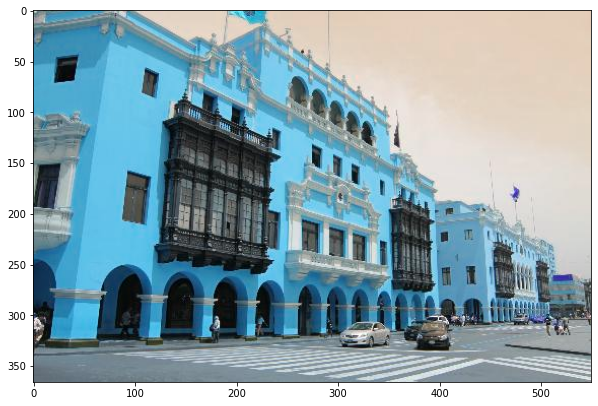

In [ ]:
img = cv2.imread('Imagenes/centro1.jpg') #Se lee una imagen
# RGB 

# BGR

print(img.shape) #Imprime el tamaño de la imagen

plt.figure(figsize=(10,10)) #Se crea una figura con un tamaño determinado
plt.imshow(img) #Se dibuja una imagen
plt.show() # Se muestra el resultado

*IMPORTANTE*: La imagen no se muestra como esperamos. Esto se debe a que OpenCV lee las imágenes a color en el orden BGR, es decir primero el canal azul, luego el canal  verde y finalmente el canal rojo. Cuando enviamos esta imagen a dibujar, Matplotlib cree que la imagen está en formato RGB. Para solucionar esto podemos hacer un cambio en los canales de color e invertirlo. 'Reed' primero, Green y Blue. 

Hay tres opciones:



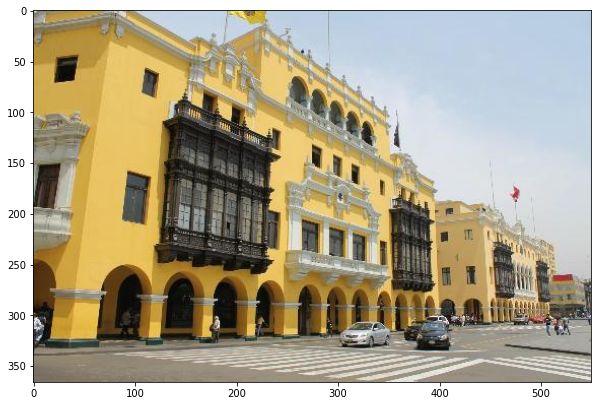

[183 143  56]


In [ ]:
#FORMAS PARA CAMBIAR EL ORDEN DEL ESPACIO DE CALOR:
#-------------------------------------------------
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Forma 1 | más eficiente
#img = img[:,:,[2, 1, 0]] #Forma 2
img = img[:,:,::-1] #Forma 3

plt.figure(figsize=(10,10)) 
plt.imshow(img) 
plt.show() 

print(img[50,50,:])


**Cambio de Espacio de Color**

Por defecto las imágenes están en el espacio de color RGB.Sin embargo al momento de procesarlas, otros espacios de color pueden ser más útiles.

Por ejemplo, muchos de las técnicas clásicas de visión computacional trabajan sobre imágenes en escalas de grises.

(366, 550)


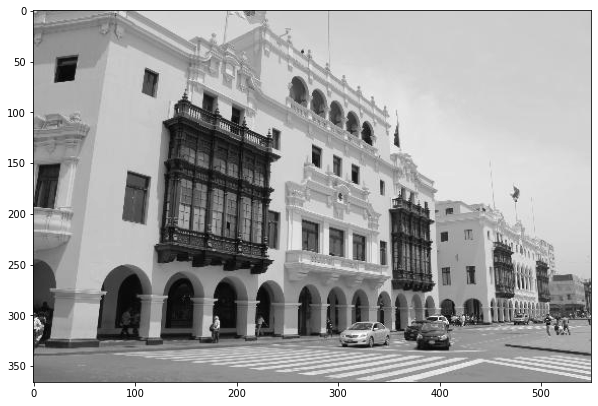

In [ ]:
#Convertir imagen a escala de grises
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Alternativamente, uno puede leer la imagen como escala de grises así:
# imgGray = cv2.imread('Imagenes/centro1.jpg',0)

print(imgGray.shape)
plt.figure(figsize=(10,10)) 
plt.imshow(imgGray, cmap='gray') 
plt.show()

Ahora utilizaremos el espacio de color HSV para seleccionar los pixeles de la imagen que tienen un color específico. Primero convertimos la imagen a HSV y calculamos cuál es el color HSV que queremos seleccionar

Recordar: el ejercicio de abajo es pasar de RGB a HSV.

Ver equivalencias prácticas: https://stackoverflow.com/questions/2612361/convert-rgb-values-to-equivalent-hsv-values-using-python 

In [ ]:
#Convertimos imagen a espacio de color HSV
import numpy as np

imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
print(imgHSV.shape)

print("veamos verde: RGB - HSV")

verde = np.uint8([[[0, 255, 0]]]) #valor numérico directo

verdeHSV = cv2.cvtColor(verde, cv2.COLOR_RGB2HSV)

print(verdeHSV)

# H in [0, 179]  : donde cada 2 grados es un color 
# En 'H' => 8 bits (no admite más de 255) => samplear angulos cada 2 grados
# S
# V
print("**"*10)
print("veamos amarillo: RGB - HSV")

amarillo = np.uint8([[[255, 255, 0]]]) #amarillo en RGB
print(amarillo)

#amarillo convertido de RGB a HSV
amarilloHSV = cv2.cvtColor(amarillo, cv2.COLOR_RGB2HSV)
print(amarilloHSV)

(366, 550, 3)
veamos verde: RGB - HSV
[[[ 60 255 255]]]
********************
veamos amarillo: RGB - HSV
[[[255 255   0]]]
[[[ 30 255 255]]]


Como vemos, hemos seleccionado el color amarilo (en RGB) y lo hemos convertido a HSV. Recuerda que el primer componente es la cromaticidad (30), el segundo componente es la saturación (255) y el tercer componente es la luminosidad (255). Por tanto, **¡siempre el valor máximo es 255!**

Si nosotros queremos seleccionar _solo_ el color amarillo en la imagen, neesitamos definir el mínimo y máximo amarillo en HSV. Esto posibilita la elección en rango. Esto es fácil: solo basta con variar primero el Hue y definir los valores correctos de saturación para permitir amarillos más claros o oscuros.


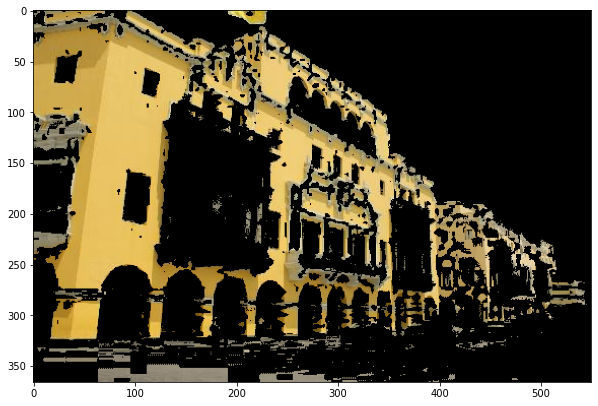

In [ ]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#lower_amarillo = np.array([20, 40, 0]) #minimo amarillo
lower_amarillo = np.array([20, 40, 100])
upper_amarillo = np.array([40, 255, 255]) #maximo amarillo

#Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask = cv2.inRange(imgHSV, lower_amarillo, upper_amarillo)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img, img, mask = mask)

plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()

Como puede verse en la imagen superior, la mayor parte del amarillo está siendo tomado. Sin embargo, falta algunos amarillos de la derecha: esto se debe a que los valores del rango de selección está muy acotado. Modificando, podríamos mejorarlo:



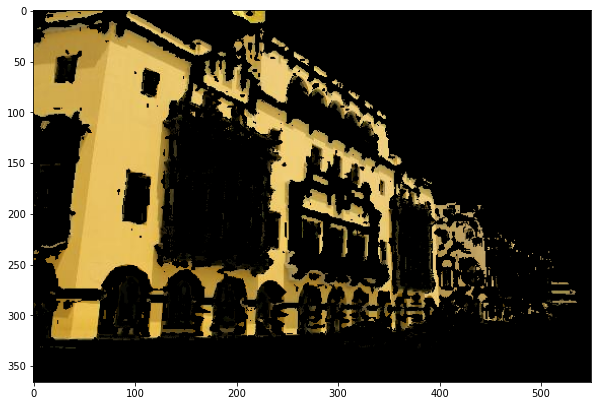

In [ ]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_amarillo = np.array([20, 100, 0]) #minimo amarillo: 
upper_amarillo = np.array([40, 255, 255]) #maximo amarillo

#Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask = cv2.inRange(imgHSV, lower_amarillo, upper_amarillo)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img, img, mask = mask)

plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()

**EJERCICIO 1**

En análisis de imágenes médicas, las imágenes de células sanguíneas en tejidos del estómago revelan la presencia de leucocitos atrofiados. Esta presencia indica una alta probabilidad de padecer de cáncer. Las células atrofiadas presentan un color azulado profundo que se diferencia del resto de células de la imagen. Utilizar análisis de espacio de colores para segmentar las células atrofiadas.

Por tanto, vamos a seleccionar solo las células dañadas (color azul/morado fuerte)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

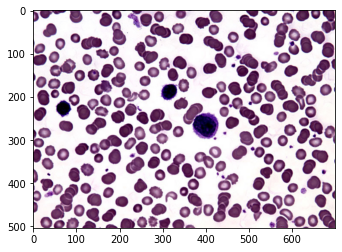

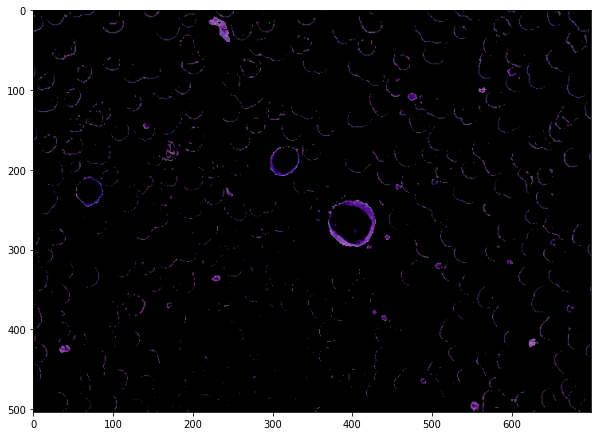

In [ ]:
img1 = cv2.imread('Imagenes/pathology_cll20x01.jpg')
img2 = cv2.imread('Imagenes/pathology_cll40x03.jpg')


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)

plt.imshow(img2)
plt.show()

#rgb(0, 0, 3)

lower_ = np.array([100, 100, 100]) #minimo morado (se ponen los valores divididos entre 2) 
#lower_ = np.array([100, 200, 0])
# en 'H' cada dos grados es un color
upper_ = np.array([145, 255, 255]) #maximo amarillo (casi siempre los dos ultimos son 255)
#en 'upper_' el primero calibra la frecuencia de matiz | deben ser mayores que lower


#lower_ = np.array([20, 40, 0]) #minimo amarillo: 
#upper_ = np.array([240, 240, 240])

#Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask = cv2.inRange(img3, lower_, upper_)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img2, img2, mask = mask) 
#se aplica el mask en las imagenes originales en csv
# esta 'mask' (mascara) dota de un valor de '0' a todo lo que no coincide
# si se quiere cambiar el fondo, ese 'mask' debe reeplazarse con otro color
# es decir, aplicarle otra mascara: 
# 'mask' es un array que coloca '0' a los arrays 
# que no coinciden con el rango de colores seleccionados
# puede cambiarse este a valores como. ejem '1' para que el fondo sea blanco

#plt.figure(figsize=(15,15))
#plt.subplot(2, 1, 1), plt.imshow(img1)
#plt.subplot(2, 1, 2), plt.imshow(img2)
#plt.show()

#print(img2[270,390,:])
#plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()

(180, 100, 3)


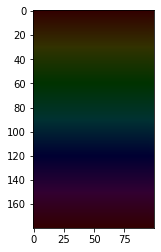

In [ ]:
img = np.zeros((180, 100, 3), 
               np.uint8)

print(img.shape)
for i in range(0, 180):
  for j in range(0, 100):
    img[i,j,0] = i
    img[i,j,1] = 255
    img[i,j,2] = 50

imgRGB = cv2.cvtColor(img, cv2.COLOR_HSV2RGB) #este es el circulo conico en las diapos de HSV

#ESPACIO DE COLORES EN HSV: IMPORTANTE PARA TOMAR EN CUENTA
plt.imshow(imgRGB)
plt.show()

(180, 100, 3)


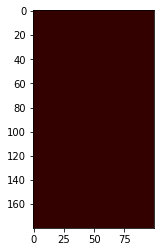

In [ ]:
img = np.zeros((180, 100, 3), np.uint8)

print(img.shape)
for i in range(0, 180):
  for j in range(0, 100):
    img[i,j,0] = 1
    img[i,j,1] = 255
    img[i,j,2] = 50

imgRGB = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

#ESPACIO DE COLORES EN HSV: IMPORTANTE PARA TOMAR EN CUENTA
plt.imshow(imgRGB)
plt.show()

# 2.- Transformación de imágenes (semana 2)

Operaciones comunes en visión computacional son transformar las imágenes. Veamos como rotamos una imagen usando una matriz de transformación e
interpolación bilineal.

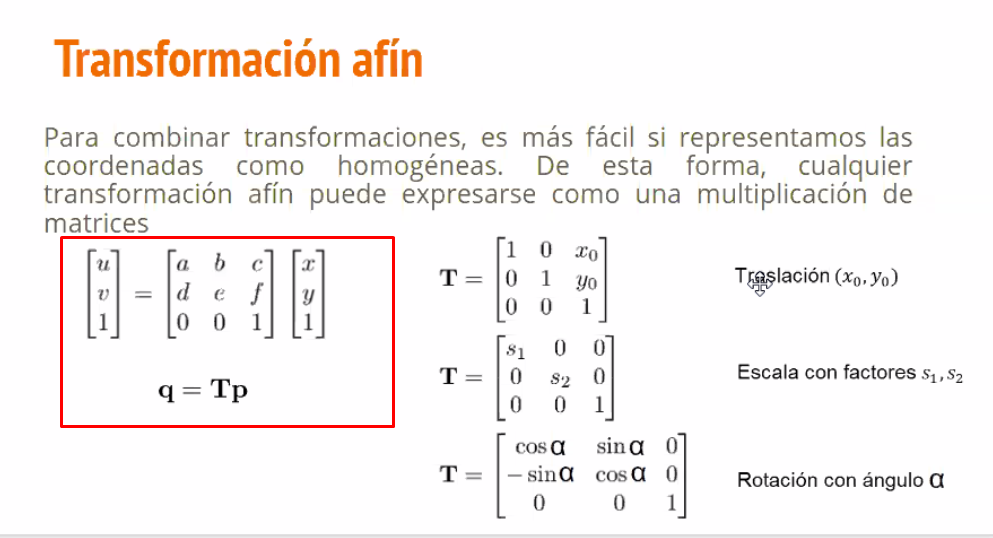


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd8486f7630>,
 <matplotlib.image.AxesImage at 0x7fd845eb6da0>)

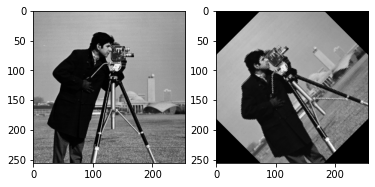

In [ ]:
def interpolar(I, coord):
    if coord[0] < 0 or coord[0] >(I.shape[1]-1) or coord[1] < 0 or coord[1] > (I.shape[0] - 1):
        return 0
    
    minx = math.floor(coord[0])
    maxx = math.ceil(coord[0])
    miny = math.floor(coord[1])
    maxy = math.ceil(coord[1])
    
    dx = coord[0] - minx
    dy = coord[1] - miny
    
    val1 = I[miny,minx]
    val2 = I[miny,maxx]
    val3 = I[maxy,maxx]
    val4 = I[maxy,minx]
    
    val11 = val1*(1-dx) + dx*val2
    val22 = val4*(1-dx) + dx*val3
    
    return val22*(1-dy) + dy*val11

def rotarImagen(I, centro, angulo, dim_salida):
    salida = np.zeros(dim_salida, dtype=np.uint8)
    angle = np.radians(angulo)
    
    T1 = np.array([[1.0, 0.0, -centro[0]],[0.0, 1.0, -centro[1]],[0.0, 0.0, 1.0]])
    T2 = np.array([[np.cos(angle), np.sin(angle), 0.0],[-np.sin(angle), np.cos(angle), 0.0],[0.0, 0.0, 1.0]])
    T3 = np.array([[1.0, 0.0, centro[0]],[0.0, 1.0, centro[1]],[0.0, 0.0, 1.0]])
    
    #T3: matriz de traslación hacia el centro de la imagen 
    #    (como si fuera el cursor para seleccionar la imagen)
    #T2: aplicación de la rotación
    #T1: volvemos al origen de coordenadas de la imagen inicial
    #Por eso se desprende el orden de multiplicación con '@': T3 x T2 x T1 
    T = T3 @ T2 @ T1

    #la inversa de la matriz (para hacer el H**(-1) de la diapositiva 34)
    #recordar que la inversa de la matriz 
    T = np.linalg.inv(T)
        
    #Iteramos sobre las posiciones de la salida
    for i in range(salida.shape[0]): #recorriendo las filas | y
        for j in range(salida.shape[1]): #recorriendo las columnas | x
            coord = np.zeros((3,1), dtype=np.float)
            coord[0] = j 
            coord[1] = i
            coord[2] = 1.0
            new_coord = T @ coord
            salida[i,j] = interpolar(I, new_coord)
    
    return salida
    
im = cv2.imread('Imagenes/cameraman.tif',0)

rows, cols = im.shape
im2 = rotarImagen(im, centro=(cols/2, rows/2), angulo=45, dim_salida=(rows, cols)) 

plt.figure()
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(im2, cmap='gray')

### Aplicando la función de rotación anterior sin una función | usando librería cv2


Podemos aplicar implementaciones más eficientes como las de OpenCV. Por ejemplo, veamos cómo escalar y rotar una imagen.

imagen original
(256, 256, 3)
imagen con el resize: extendemos al doble los ejes X e y
(512, 512, 3)


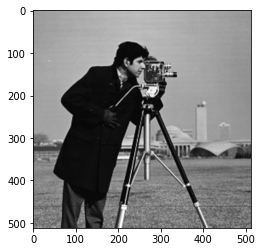

In [ ]:
img = cv2.imread('Imagenes/cameraman.tif')
print("imagen original")
print(img.shape)

#fx: ancho del eje x
#fy: amcho del eje y
#juegue con ambos valores y corra la celda para modificar extension imagen
result = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
print("imagen con el resize: extendemos al doble los ejes X e y")
print(result.shape)

#para ver diferencias
plt.imshow(result, cmap='gray')
plt.show()

APLICAMOS la operación de ROTACIÓN.


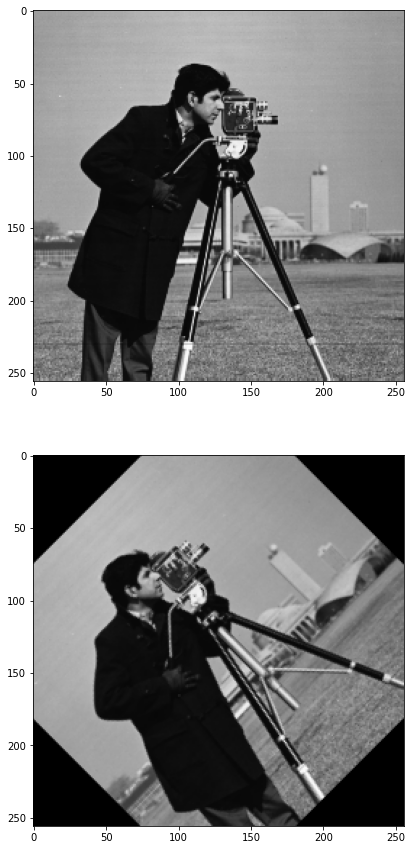

In [ ]:
#extraemos valores 'X' (COLUMNS) e 'y' (ROWS)
rows, cols, _ = img.shape

#dividimos entre dos dado que le habíamos puesto en la celda anterior
#una doble extensión con fx=2, fy=2,
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)

# Sirve para rotacion, escala, traslacion y shear
result = cv2.warpAffine(img, M, (cols, rows))

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1), plt.imshow(img)
plt.subplot(2, 1, 2), plt.imshow(result)
plt.show()

#Nota, hacemos esto para una imagen de escala de grises porque tiene 2 canales
#es mas sencillo
#una tareita podia ser averiguar esto para una imagen de 3 canales
#es decir, una imagen que tenga COLOR

Una transformación más general es la transformación en perspectiva que permite corregir objetos con deformaciones más complejas.

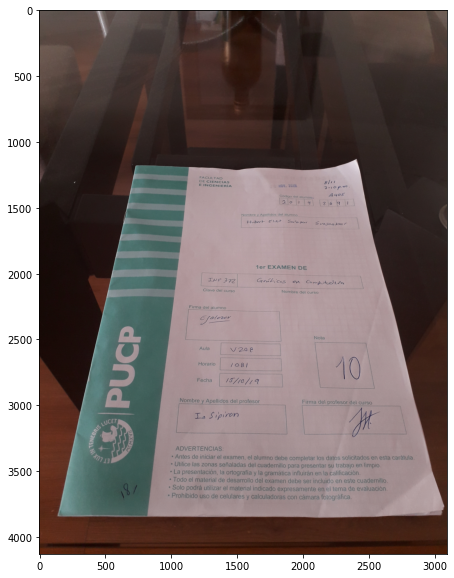

In [ ]:
#Leemos la imagen a corregir
#trabajaremos no la rotacion (involucra preservacion de color)
#sino el cambio de perspectiva
img = cv2.imread('Imagenes/20191123_093200.jpg')
img = img[:,:,::-1]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

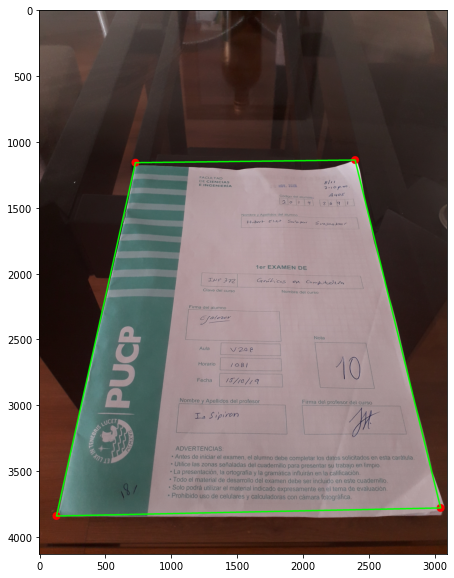

In [ ]:
#Definimos los puntos de las esquinas del papel
#Dibujamos los puntos y el poligono en la imagen

#seleccionadmos los puntos de seleccion 
# (cuadro coordenadas = cuatro esquinas del papel)
# googlear para seleccion de los (X;y) subiendo una imagen dada
puntos = np.float32([[731, 1158],[2398, 1138],[3047, 3778], [132, 3839]])

#hacemos una copia de la imagen original
imgDibujo = img.copy()

#iteramos sobre cada punto de la imagen
for i in range(0, 4):
  #convertirmos los cuatro puntos en tuplas
  #para la creación de un círculo coloreado en formato RGB
  cv2.circle(imgDibujo, tuple(puntos[i]), 30, (255,0,0), -1) #30: red, (255,0,0): green, -1:blue)

pts = puntos.reshape((-1,1,2))

#definimos el grosor de la selección
cv2.polylines(imgDibujo, [pts.astype(np.int32)], True, (0,255,0), thickness=10)

plt.figure(figsize=(10,10))
plt.imshow(imgDibujo)
plt.show()

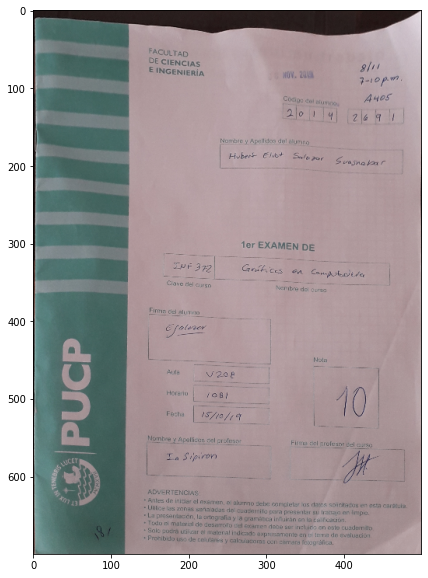

In [ ]:
#definimos ancho y largo
#este proceso es similar al escaneo
#aqui seleccionados solamente lo anteriormente segmentado en la imagen
width = 500
height = 700

# Hacemos la transformacion
target = np.float32([[0,0],[width,0],[width,height],[0,height]])

#obtener la perspectiva de seleccion de la imagen original segun los puntos
matrix = cv2.getPerspectiveTransform(puntos, target)
#deformar la perspectiva original: warPerspective
result = cv2.warpPerspective(img, matrix, (width,height))

plt.figure(figsize=(10,10))
plt.imshow(result)
plt.show()

#note cómo no es solamente una simple selección
#sino también un movimiento de la imagen
#lo que permite ver datos que en la imagen original no se veían
#como la parte superior de la hoja del examen
#esto se debe a la proyección que se hace del segmento seleccionado de la imagen
#recordar que este es un proceso de interpolación bilinear
#para la interpolación cúbica, se requiere usar más puntos, por ejemplo (un vecindario 4x4)
#lo que acrecenta la tonalidad para la escala de grises a la tonalidad seleccionada 
#y, en consecuencia, calidad a la imagen, pero también complejidad
#en el bilinear simplemente se requiere usar un vecindario de proximidad para filas y columnas
#es decir, para X e Y: el orden de lectura siempre es FILAS y luego COLUMNAS

**EJERCICIO 2**

Crear una función que realice un flip horizontal sobre una imagen
Crear una función que realice un flip vertical sobre una imagen

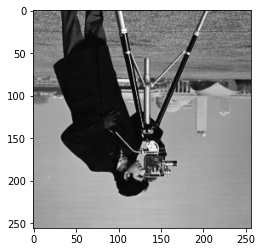

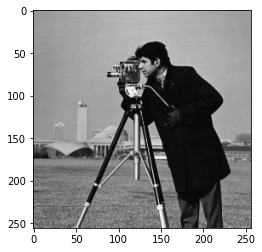

(<matplotlib.image.AxesImage at 0x7fd850494128>, None)

In [ ]:
img = cv2.imread('Imagenes/cameraman.tif')

img2 = img[::-1,:,:]
img3 = img[:,::-1,:]

plt.imshow(img2), plt.show()
plt.imshow(img3), plt.show()


# 3.- Convolucion de imágenes

Es la operación más importante de visión computacional. Permite encontrar representaciones en diferentes escalas de una imagen. Es el ingrediente principal de la visión computacional moderna (de ahí el nombre de redes neuronales convolucionales). Veamos como se implementa una función de convolución para entender su funcionamiento.

In [ ]:
#Funcion que calcula la convolucion de una imagen con un filtro
# Filtros son siempre de tamaño impar
def convolucion(imagen, filtro):
    #Zero padding
    shift_row = filtro.shape[0]//2
    shift_col = filtro.shape[1]//2
    
    #nueva imagen construida con el padding: 
    #shift_col (columnas nuevas) y shit_row (filas nuevas)
    new_image = np.zeros((imagen.shape[0] + 2*shift_row, imagen.shape[1] + 2*shift_col), 
                         np.float32)
    new_image[shift_row:imagen.shape[0]+shift_row,shift_col:imagen.shape[1]+shift_col] = imagen
    
    #Imagen resultante
    new_image2 = np.zeros((new_image.shape[0], new_image.shape[1]), np.float32)
    
    #Perform filtering | se consolida convolucion
    #iteracion a través de las dimensiones
    #iteracion por fila primero (siempre) y luego columna
    for i in range(shift_row, imagen.shape[0]+shift_row):
        for j in range(shift_col, imagen.shape[1]+shift_col):
            aux = new_image[i-shift_row:i+shift_row+1, j-shift_col:j+shift_col+1]
            new_image2[i,j] = np.sum(aux*filtro)
    
    #quitamos el padding una vez filtramos la imagen             
    return new_image2[shift_row:imagen.shape[0]+shift_row,shift_col:imagen.shape[1]+shift_col]

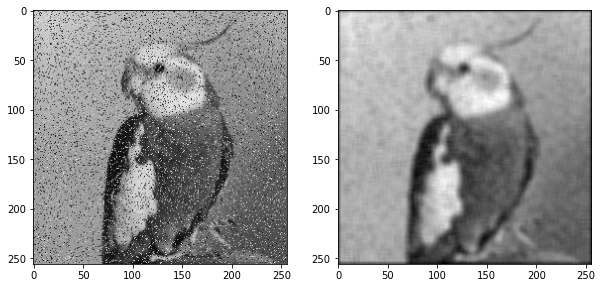

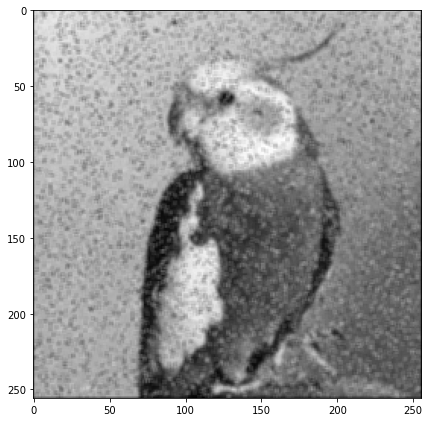

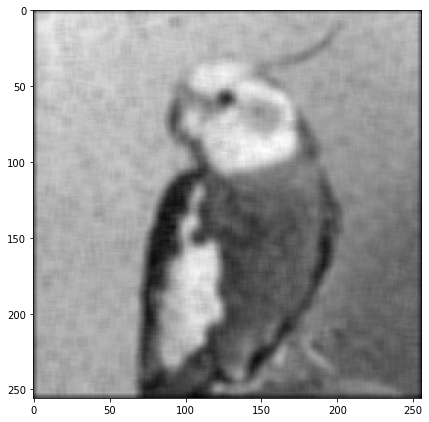

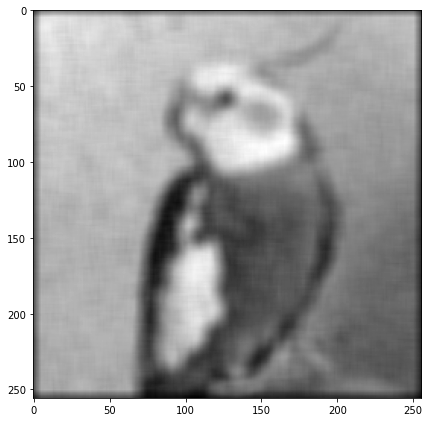

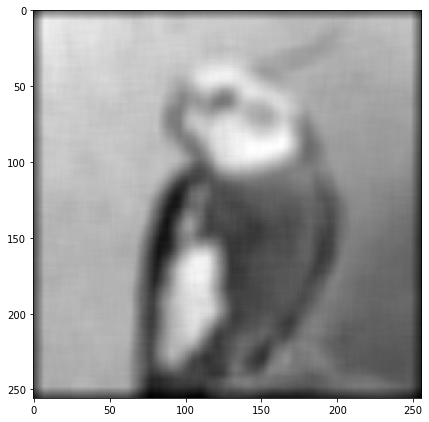

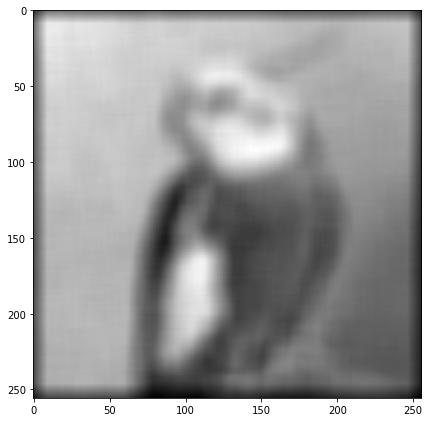

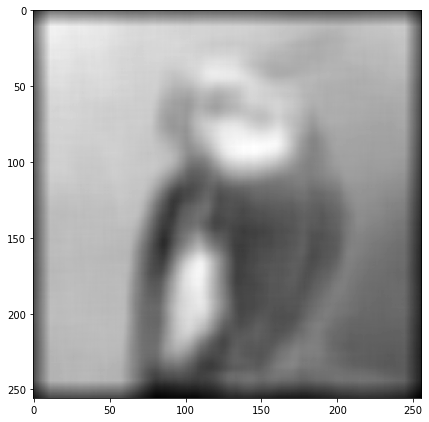

In [ ]:
import numpy as np
#Aplicamos la convolucion con un filtro en donde todos los pesos son iguales
im = cv2.imread('Imagenes/lorito.jpg', 0)

#tamaño del filtro
tamFiltro = 7

#filtro promedio
filtro = (1/(tamFiltro**2))*np.ones((tamFiltro,tamFiltro))

#probemos con diversos tamaños de filtro
tams = [3,7,11,15,19,23]

#matriz del filtro (kernel) se pasa a la función convolución
im2 = convolucion(im, filtro)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(im2, cmap='gray')
plt.show()


for i, tam in enumerate(tams):
  filter = (1/(tam)**2)*np.ones((tam,tam))
  img = convolucion(im, filter)
  plt.figure(figsize=(250,50))
  plt.subplot(len(tams),1,i+1), plt.imshow(img, cmap='gray')

  plt.show()

***

El filtro visto arriba es un filtro de promedio. Lo que hace es promediar los valores de color en una vecindad, por eso crea un efecto de blur. Pero la convolución también puede servir para realzar los detalles de una imagen. Veamos por ejemplo el conocido filtro Laplaciano.

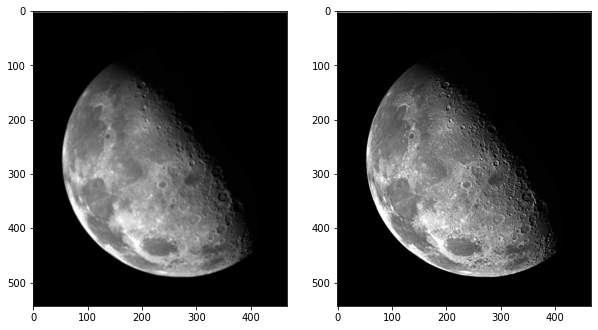

In [ ]:
# Filtro de Laplacian
im = cv2.imread('Imagenes/moon.jpg', 0)
filtro = np.array([[0,1,0],
                   [1, -4, 1],
                   [0, 1, 0]])

laplacian = convolucion(im, filtro)

#a la imagen original se la está restando la convolución
#esto es por la "regla" de laplacian
#que dice que si el centro de negativo (-4) se resta
#si fuese positivo (4) simplemente se le suma
out = im - laplacian
#print(out)
np.clip(out, 0, 255, out = out)
out = out.astype('uint8')
#print(out)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(out, cmap='gray')
plt.show()

## TAREA - APLICAR OTROS FILTROS

Detectar los bordes aplicando los **filtros de sobel**



In [ ]:
#FILTRO DE SOBEL: detención de bordes

#ubica bordes en orientación horizontales
#máscara para eje x | kernel para X
filtro_x = np.array([[-1,0,1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

#ubica bordes en orientación verticales
#máscara para eje y | Kernel para Y
filtro_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

#Se aplica para toda la imagen
#el primero resaltará más los eje X
#el segundo resaltará más los eje Y

In [ ]:
#combinación de filtros y elevarlos al cuadrado

#convolución bordes de orden horizontal
sobel_x = convolucion(im, filtro_x)

#convolución bordes de orden vertical
sobel_y = convolucion(im, filtro_y)

In [ ]:
outX = (im + sobel_x)
outY = (im + sobel_y)

In [ ]:
"""
Si quisiéramos tener un único resultado de unión 
de bordes verticales y horizontales, debemos computar
la magnitud unificada de la imagen de ambas perspectivas.

Es decir, juntar los bordes resaltados horizontales y verticales.

Forma de combinación y de salida:

#Distancia euclideana:

O = srqt(Gx^2 + Gy^2)

Puede también aplicar filtros para bordes diagonales.
De ese modo, al igual que los horizontales y verticales, 
podemos juntar ya tres aspectos de realce: diagonal, horizontal y vertical.
"""

#O = srqt(Gx^2 + Gy^2)
outXY = np.sqrt(sobel_x**2 + sobel_y**2)

#normalización para los pixeles
#entre valores de 0 y 255
np.clip(outXY, 0, 255, out = outXY)
outXY = outXY.astype('uint8')

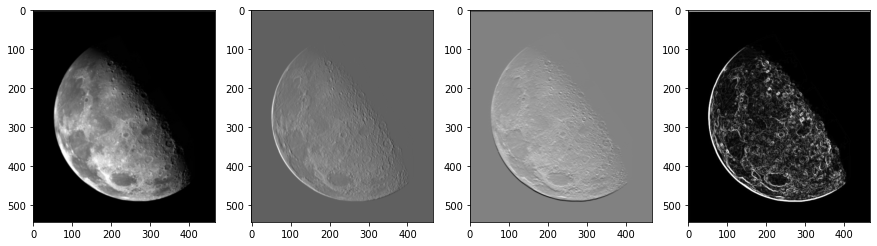

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1), plt.imshow(im, cmap='gray')
plt.subplot(1,4,2), plt.imshow(outX, cmap='gray')
plt.subplot(1,4,3), plt.imshow(outY, cmap='gray')
plt.subplot(1,4,4), plt.imshow(outXY, cmap='gray')
plt.show()

***


## 3.1.- Dominio de Frecuencias
Es posible procesar una imagen en el dominio de sus frecuencias. En este tema usamos la transformada de Fourier para computar una representación espectral de la imagen y procesarla en este dominio. Primero grafiquemos la magnitud del espectro de una imagen.

In [ ]:
img = cv2.imread('Imagenes/cameraman.tif', 0)
#Calculamos la transformada de Fourier de la imagen. El resultado es una matriz de números complejos que 
#representa los coeficientes de frecuencia de la imagen
f = np.fft.fft2(img)
f = np.fft.fftshift(f) #Mo
magnitud = 20 * np.log(1+np.abs(f))

print(f.dtype)

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.subplot(1,2, 2), plt.imshow(magnitud, cmap='gray')
plt.show()

La imagen "sine.jpg" contiene un patrón periódico particular. Miremos cómo luce su espectro.

In [ ]:
img = cv2.imread('Imagenes/sine.jpg', 0)
f = np.fft.fft2(img)
f = np.fft.fftshift(f)
magnitud = 20 * np.log(1+np.abs(f))

print(f.dtype)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.subplot(1,2, 2), plt.imshow(magnitud, cmap='gray')
plt.show()

Ahora vamos a realizar un filtrado pasa-baja en el dominio de frecuencias.

In [ ]:
im = cv2.imread('Imagenes/cameraman.tif', 0)
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)

rows, cols = im.shape
crow, ccol = rows//2, cols//2

#Qué pasa si cambiamos el valor del radio de la máscara?
support = 15

mask = np.zeros((rows, cols))
mask[crow-support:crow+support, ccol-support:ccol+support] = 1

plt.figure()
plt.imshow(255*mask, cmap='gray')
plt.show()

fshift = fshift * mask

f_ishift = np.fft.ifftshift(fshift)
im_back = np.fft.ifft2(f_ishift)
im_back = np.abs(im_back)

plt.subplot(1, 2, 1), plt.imshow(im, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(im_back, cmap='gray')
plt.show()

**Ejercicio - Filtro pasa alta**

Implementar el filtro pasa alta en el dominio de frecuencias

In [ ]:
#Implementación del filtro pasa alta aquí

Ahora implementemos el filtro gaussiano en el dominio de frecuencias

In [ ]:
im = cv2.imread('Imagenes/cameraman.tif', 0)
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)

rows, cols = im.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols))

## Cómo influye la desviación del Gaussiano en el filtrado?
desv = 50
for i in range(0, rows):
  for j in range(0, cols):
    mask[i,j] = np.exp(-((crow - i)**2 + (ccol - j)**2)/(desv**2))

plt.figure()
plt.imshow(255*mask, cmap='gray')
plt.show()

fshift = fshift * mask

f_ishift = np.fft.ifftshift(fshift)
im_back = np.fft.ifft2(f_ishift)
im_back = np.abs(im_back)

plt.subplot(1, 2, 1), plt.imshow(im, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(im_back, cmap='gray')
plt.show()